<a href="https://colab.research.google.com/github/PayalBarnwal03/Alfido-Tech/blob/master/Inventory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Inventory Analysis***

In [2]:
#Importing Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
#Loading Datasets
purchase_price=pd.read_csv('/content/2017PurchasePricesDec.csv')

In [10]:
beginv=pd.read_csv('/content/BegInvFINAL12312016.csv')

In [20]:
endinv=pd.read_csv('/content/EndInvFINAL12312016.csv')

In [21]:
inv_purchase=pd.read_csv('/content/InvoicePurchases12312016.csv')

In [22]:
purchases=pd.read_csv('/content/PurchasesFINAL12312016.csv')

In [23]:
sales=pd.read_csv('/content/SalesFINAL12312016.csv')

1. **purchase_price**

In [ ]:
# 1. purchase_price
purchase_price.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [ ]:
purchase_price.describe()

,Brand,Price,Classification,PurchasePrice,VendorNumber
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,17989.067123,38.640240,1.708996,26.488220,10814.861757
std,12528.503464,206.151172,0.454244,156.182948,19007.682322
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5990.000000,10.990000,1.000000,6.890000,3960.000000
50%,18788.000000,15.990000,2.000000,10.650000,7153.000000
75%,25117.000000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


In [ ]:
purchase_price.shape

(12261, 9)

In [ ]:
purchase_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


In [ ]:
purchase_price.isnull().sum()

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [ ]:
purchase_price.dropna(inplace=True)

In [ ]:
purchase_price.isnull().sum()

Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [ ]:
purchase_price.corr()

<ipython-input-16-ff150d7ddfc6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  purchase_price.corr()


,Brand,Price,Classification,PurchasePrice,VendorNumber
Brand,1.000000,-0.035824,0.733686,-0.043301,0.062648
Price,-0.035824,1.000000,-0.047130,0.997658,-0.014470
Classification,0.733686,-0.047130,1.000000,-0.056458,0.093307
PurchasePrice,-0.043301,0.997658,-0.056458,1.000000,-0.014135
VendorNumber,0.062648,-0.014470,0.093307,-0.014135,1.000000


<ipython-input-17-4c6fe3e9963b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=corr=purchase_price.corr()


<Axes: >

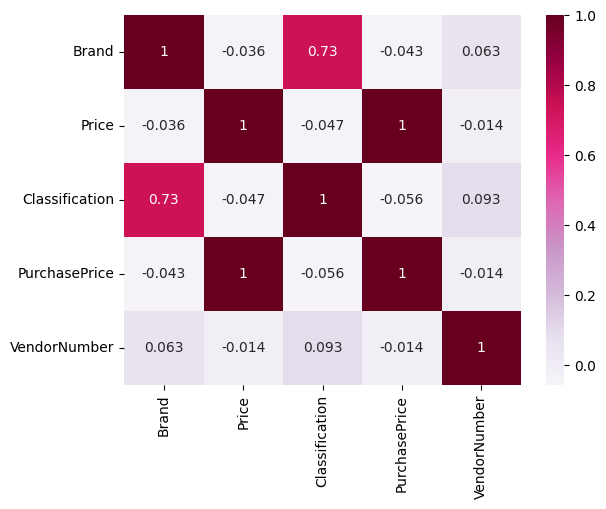

In [ ]:
corr=corr=purchase_price.corr()
sns.heatmap(corr,annot=True,cmap='PuRd')

<Axes: xlabel='Classification', ylabel='Brand'>

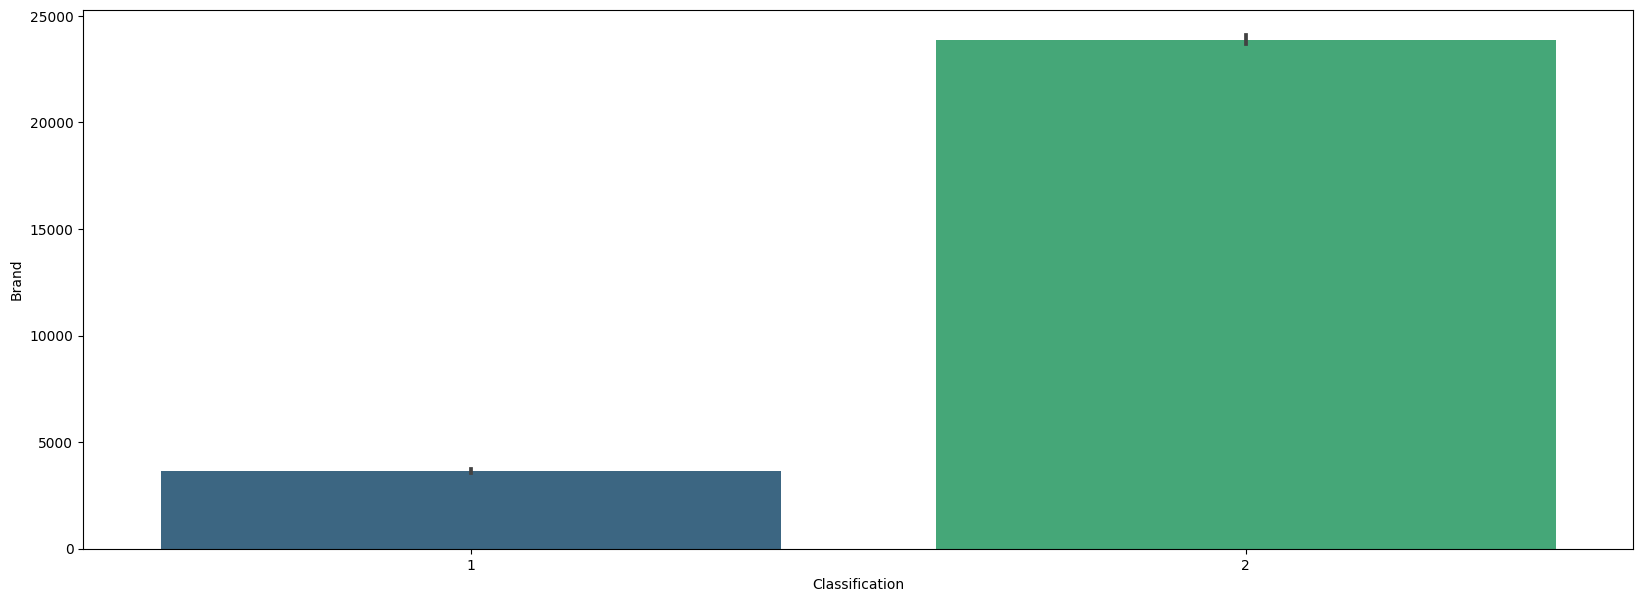

In [ ]:
f=plt.figure()
f.set_figheight(7)
f.set_figwidth(20)
sns.barplot(x='Classification',y='Brand' ,data=purchase_price, palette="viridis")

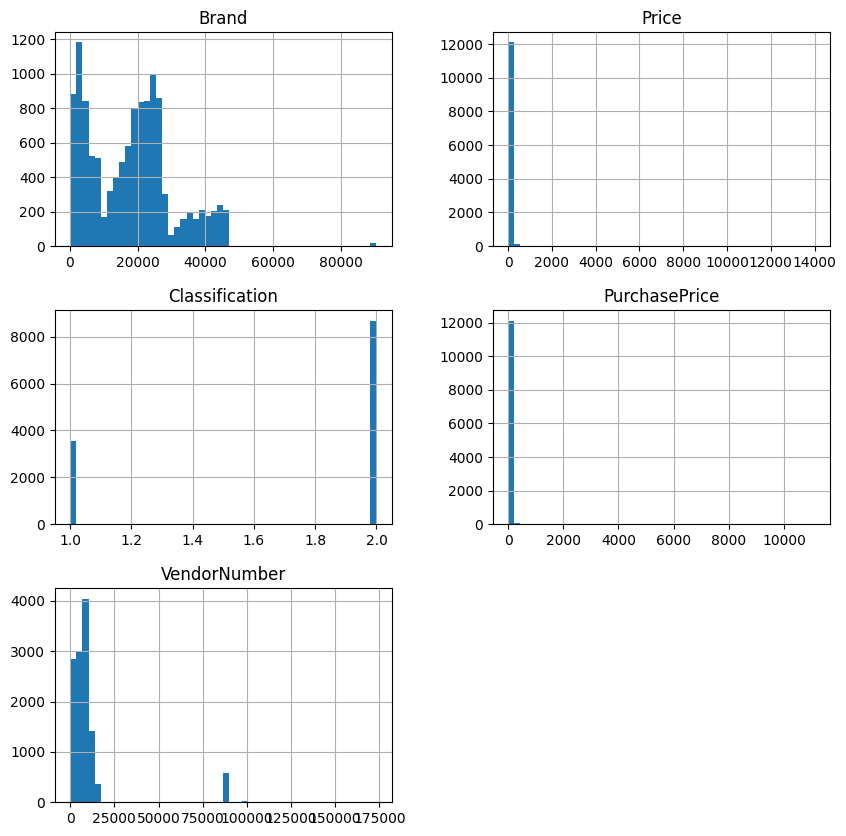

In [ ]:
purchase_price.hist(figsize=(10,10),bins=50)
plt.show()

In [ ]:
purchase_price.Classification.unique()

array([1, 2])

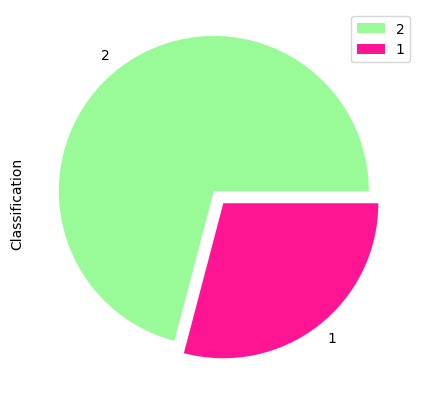

In [ ]:
plt.figure(figsize=(5,12))

# Creating explode data
explode = (0.1, 0.0)

# Creating color parameters
colors = (  "palegreen", "deeppink")


purchase_price['Classification'].value_counts().plot.pie(explode = explode, colors=colors)
plt.legend()
plt.show()

2.**Beginv**

In [ ]:
# 2.beginv
beginv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [ ]:
beginv.describe()

,Store,Brand,onHand,Price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,22.253910
std,23.191393,13059.429355,31.467342,70.178964
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,13999.900000


In [ ]:
beginv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [ ]:
beginv.shape

(206529, 9)

In [ ]:
beginv.nunique()

InventoryId    206529
Store              79
City               67
Brand            8094
Description      7291
Size               41
onHand            474
Price             329
startDate           1
dtype: int64

In [ ]:
beginv.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [ ]:
beginv.corr()

<ipython-input-14-8c4843e2ad2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  beginv.corr()


,Store,Brand,onHand,Price
Store,1.000000,0.039331,0.077987,0.030347
Brand,0.039331,1.000000,-0.033851,-0.042091
onHand,0.077987,-0.033851,1.000000,-0.056660
Price,0.030347,-0.042091,-0.056660,1.000000


<ipython-input-15-7d16d8d67c25>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=corr=beginv.corr()


<Axes: >

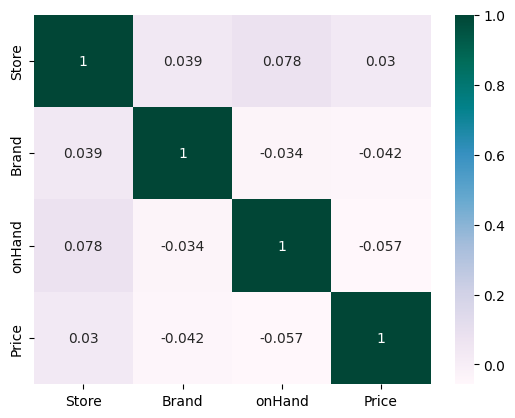

In [ ]:
corr=corr=beginv.corr()
sns.heatmap(corr,annot=True,cmap='PuBuGn')

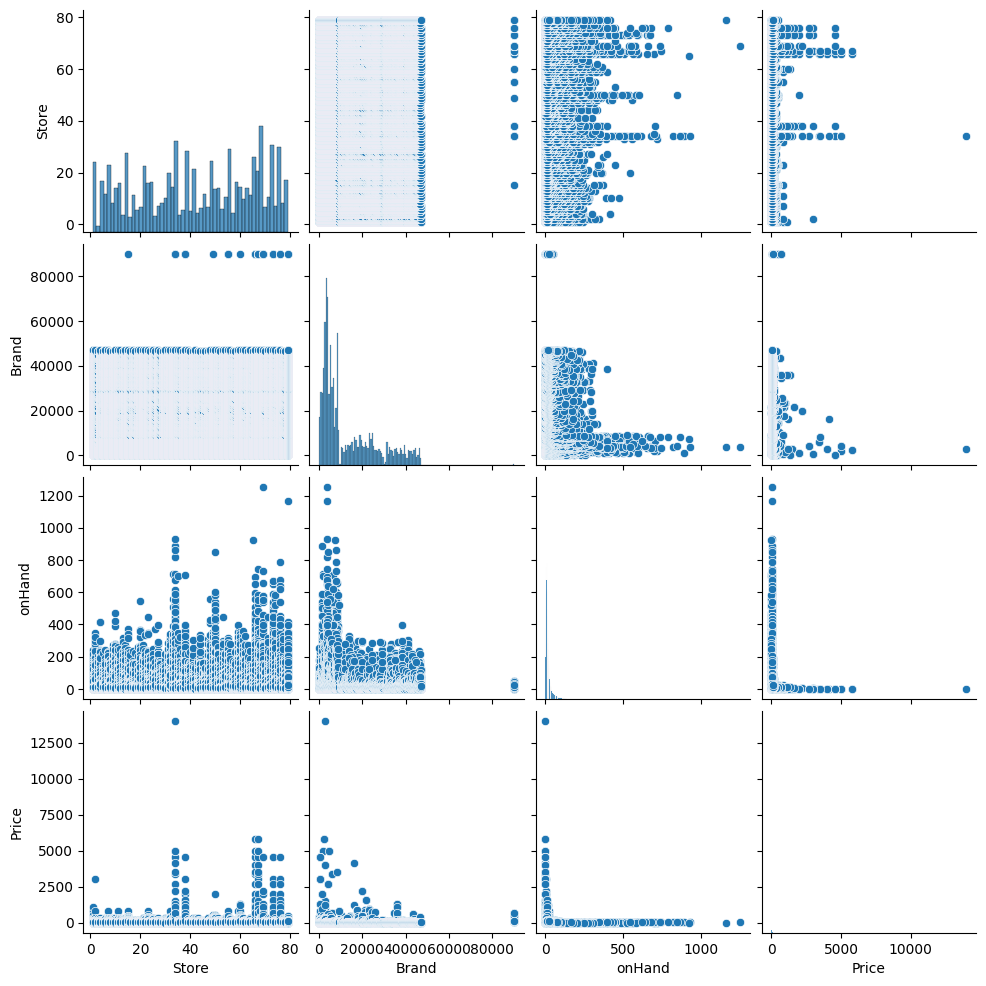

In [ ]:
sns.pairplot(beginv)

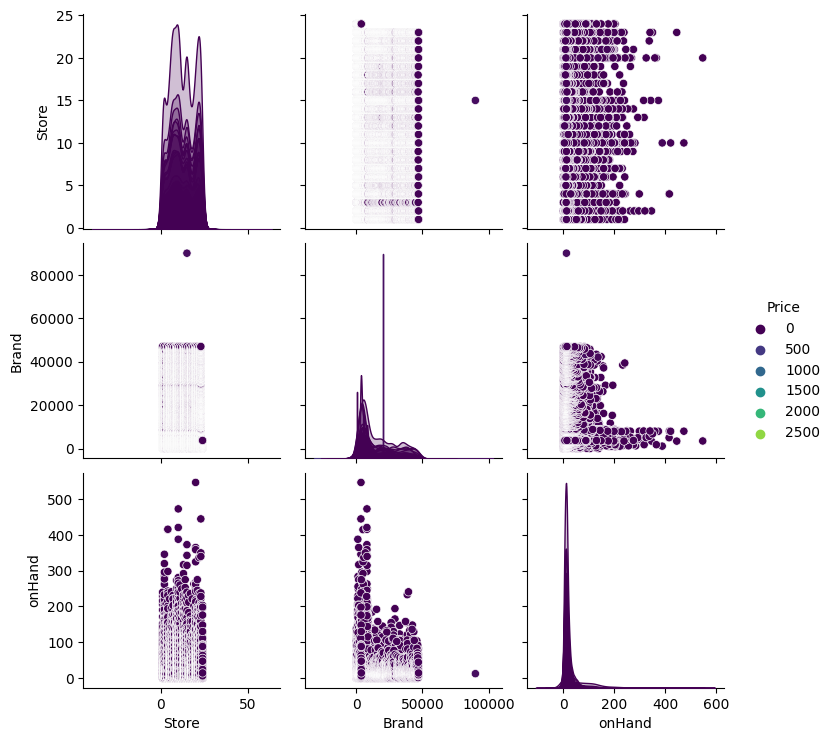

In [14]:
sns.pairplot(beginv, hue='Price', palette='viridis')

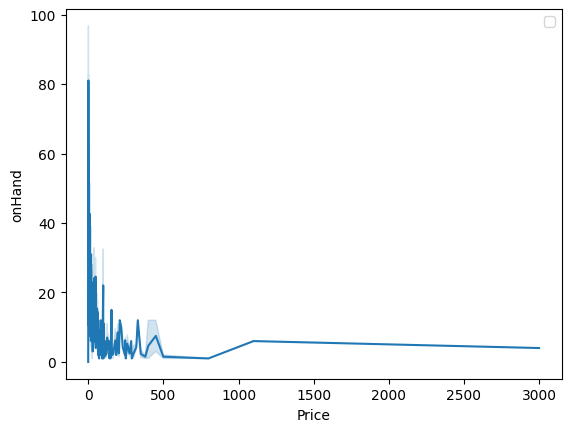

In [18]:
sns.lineplot(x='Price',y='onHand',data=beginv)
plt.legend()
plt.show()

3. **Endinv**

In [24]:
# 3.endinv
endinv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11.0,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7.0,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7.0,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4.0,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7.0,14.99,2016-12-31


In [25]:
endinv.describe()

,Store,Brand,onHand,Price
count,68088.000000,68088.000000,68087.000000,68087.000000
mean,14.498678,13307.364572,19.269802,19.772004
std,8.090144,12881.257376,27.928065,22.554625
min,1.000000,58.000000,0.000000,0.990000
25%,8.000000,3658.000000,6.000000,9.990000
50%,15.000000,7221.000000,11.000000,13.990000
75%,22.000000,21407.000000,20.000000,21.990000
max,30.000000,90631.000000,1038.000000,999.990000


In [26]:
endinv.shape

(68088, 9)

In [28]:
endinv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68088 entries, 0 to 68087
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InventoryId  68088 non-null  object 
 1   Store        68088 non-null  int64  
 2   City         68088 non-null  object 
 3   Brand        68088 non-null  int64  
 4   Description  68087 non-null  object 
 5   Size         68087 non-null  object 
 6   onHand       68087 non-null  float64
 7   Price        68087 non-null  float64
 8   endDate      68087 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.7+ MB


In [29]:
endinv.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    1
Size           1
onHand         1
Price          1
endDate        1
dtype: int64

In [30]:
endinv.dropna(inplace=True)

In [32]:
endinv.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64

In [33]:
endinv.nunique()

InventoryId    68087
Store             30
City              29
Brand           5908
Description     5269
Size              39
onHand           315
Price            225
endDate            1
dtype: int64

<ipython-input-34-140b775bb868>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=corr=endinv.corr()


<Axes: >

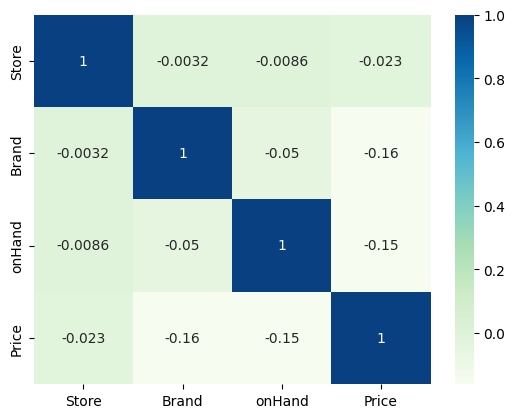

In [34]:
corr=corr=endinv.corr()
sns.heatmap(corr,annot=True,cmap='GnBu')

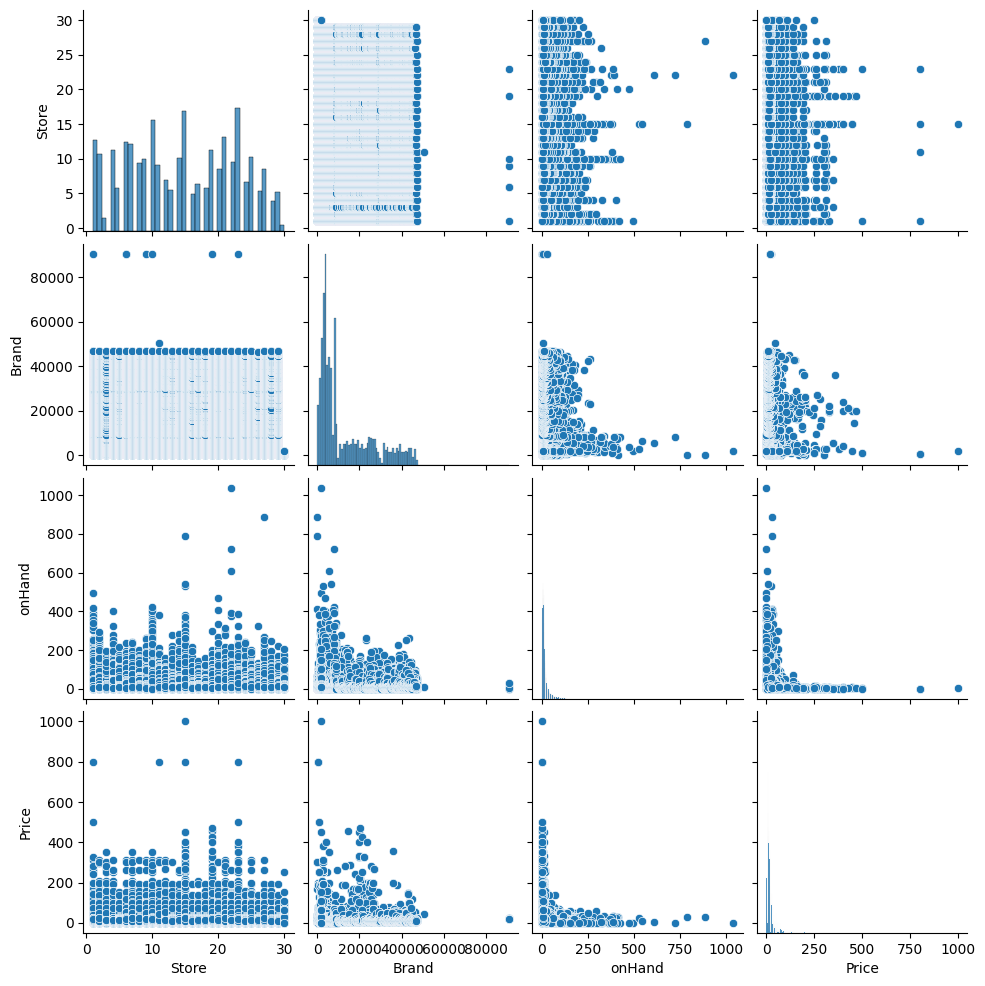

In [35]:
sns.pairplot(endinv)

In [ ]:
sns.pairplot(endinv, hue='Price', palette='viridis')

# 4.**inv_purchase**

In [37]:
inv_purchase.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,None


In [38]:
inv_purchase.describe()

,VendorNumber,PONumber,Quantity,Dollars,Freight
count,5543.00000,5543.000000,5543.000000,5.543000e+03,5543.000000
mean,20662.75212,10889.419087,6058.880931,5.807338e+04,295.954301
std,34582.15841,1600.859969,14453.338164,1.402340e+05,713.585093
min,2.00000,8106.000000,1.000000,4.140000e+00,0.020000
25%,3089.00000,9503.500000,83.000000,9.678100e+02,5.020000
50%,7240.00000,10890.000000,423.000000,4.765450e+03,24.730000
75%,10754.00000,12275.500000,5100.500000,4.458718e+04,229.660000
max,201359.00000,13661.000000,141660.000000,1.660436e+06,8468.220000


In [39]:
inv_purchase.shape

(5543, 10)

In [40]:
inv_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      5543 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [42]:
inv_purchase.isnull().sum()

VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
dtype: int64

In [79]:
inv_purchase.dtypes

VendorNumber      int64
VendorName       object
InvoiceDate      object
PONumber          int64
PODate           object
PayDate          object
Quantity          int64
Dollars         float64
Freight         float64
Approval         object
dtype: object

In [43]:
inv_purchase.nunique()

VendorNumber     126
VendorName       129
InvoiceDate      373
PONumber        5543
PODate           319
PayDate          382
Quantity        2895
Dollars         5226
Freight         4052
Approval           2
dtype: int64

In [44]:
inv_purchase.corr

<bound method DataFrame.corr of       VendorNumber                   VendorName InvoiceDate  PONumber  \
0              105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1             4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2              388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169   
3              480  BACARDI USA INC              2016-01-12      8106   
4              516  BANFI PRODUCTS CORP          2016-01-07      8170   
...            ...                          ...         ...       ...   
5538          9622  WEIN BAUER INC               2017-01-06     13626   
5539          9625  WESTERN SPIRITS BEVERAGE CO  2017-01-10     13661   
5540          3664  WILLIAM GRANT & SONS INC     2017-01-02     13643   
5541          9815  WINE GROUP INC               2017-01-03     13602   
5542         90058  ZORVINO VINEYARDS            2017-01-05     13574   

          PODate     PayDate  Quantity    Dollars  Freight Approval  
0     2015-12-21  201

<ipython-input-46-49fbed5cfbc2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=corr=inv_purchase.corr()


<Axes: >

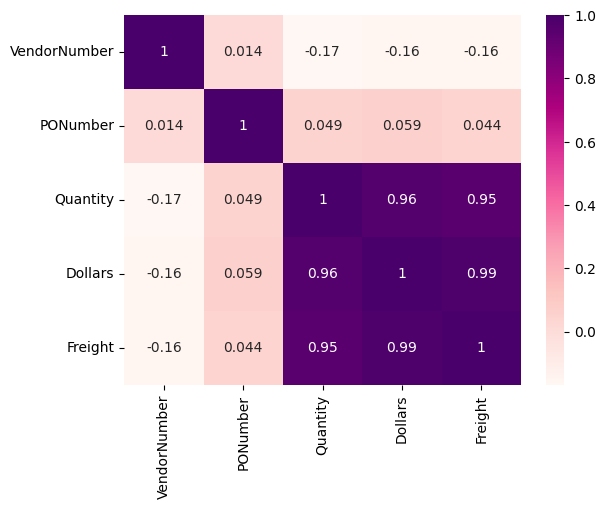

In [46]:
corr=corr=inv_purchase.corr()
sns.heatmap(corr,annot=True,cmap='RdPu')

<Axes: xlabel='Approval', ylabel='Quantity'>

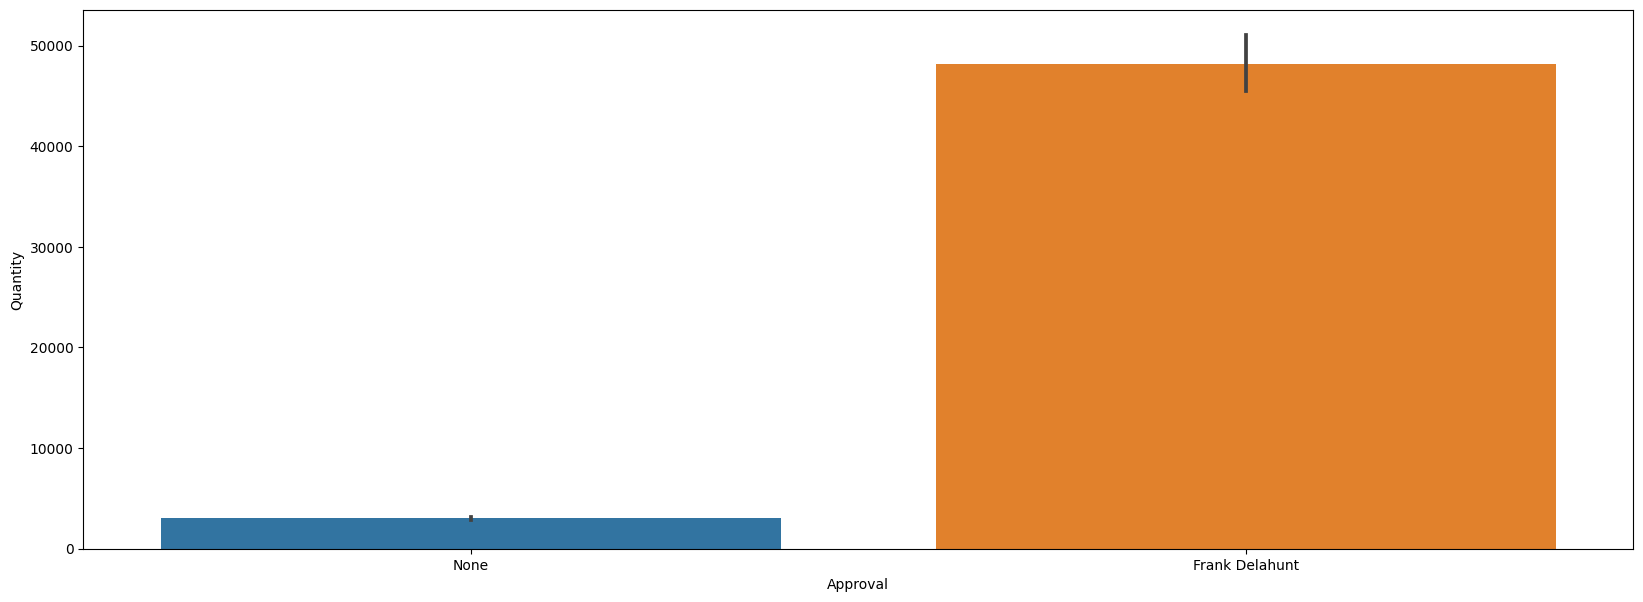

In [84]:
f=plt.figure()
f.set_figheight(7)
f.set_figwidth(20)
sns.barplot(x='Approval',y='Quantity' ,data=inv_purchase)

<Axes: xlabel='Dollars', ylabel='Count'>

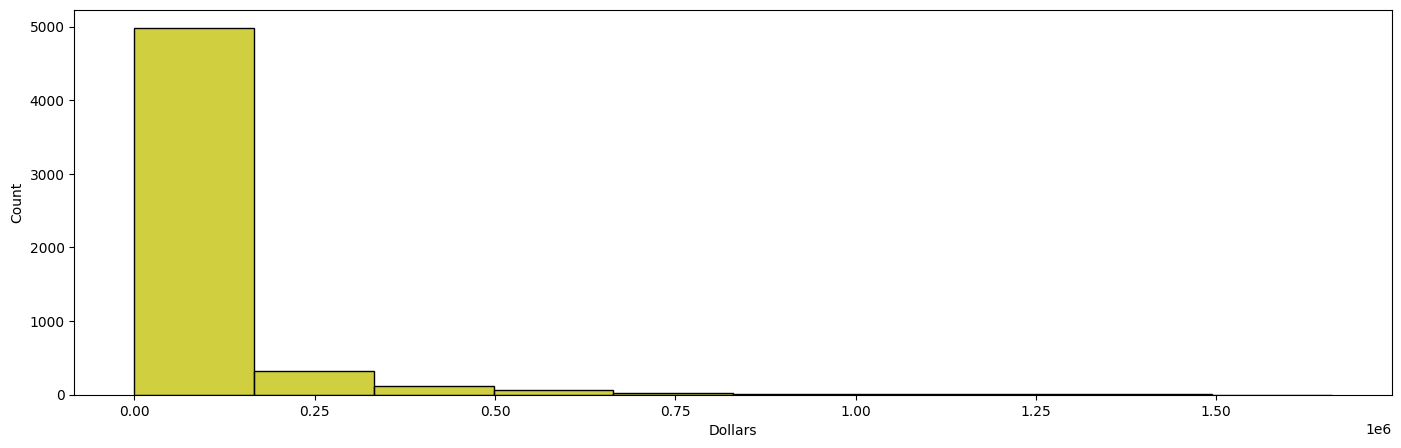

In [86]:
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(5)
sns.histplot(x ='Dollars' , bins= 10 ,color="y",edgecolor='k' , data=inv_purchase)

# 5.**Purchases**

In [47]:
purchases.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6.0,214.26,1.0
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4.0,37.40,1.0
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5.0,47.05,1.0
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6.0,56.10,1.0
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5.0,106.60,1.0


In [48]:
purchases.describe()

,Store,Brand,VendorNumber,PONumber,PurchasePrice,Quantity,Dollars,Classification
count,18651.000000,18651.000000,18651.000000,18651.000000,18651.000000,18650.000000,18650.000000,18650.000000
mean,40.567155,11548.163208,4421.666184,8211.479813,12.108291,16.950295,169.633161,1.419517
std,24.632889,12302.653947,7143.463082,58.674859,10.069097,28.798490,359.299226,0.493493
min,1.000000,58.000000,105.000000,8106.000000,0.620000,1.000000,1.420000,1.000000
25%,18.000000,3614.000000,1392.000000,8159.000000,6.160000,6.000000,56.767500,1.000000
50%,38.000000,5707.000000,2242.000000,8210.000000,9.650000,11.000000,94.090000,1.000000
75%,66.000000,15913.500000,4425.000000,8269.000000,15.260000,12.000000,165.600000,2.000000
max,79.000000,47027.000000,98450.000000,8289.000000,240.590000,1080.000000,15303.600000,2.000000


In [49]:
purchases.size

298416

In [50]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18651 entries, 0 to 18650
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InventoryId     18651 non-null  object 
 1   Store           18651 non-null  int64  
 2   Brand           18651 non-null  int64  
 3   Description     18651 non-null  object 
 4   Size            18651 non-null  object 
 5   VendorNumber    18651 non-null  int64  
 6   VendorName      18651 non-null  object 
 7   PONumber        18651 non-null  int64  
 8   PODate          18651 non-null  object 
 9   ReceivingDate   18651 non-null  object 
 10  InvoiceDate     18651 non-null  object 
 11  PayDate         18651 non-null  object 
 12  PurchasePrice   18651 non-null  float64
 13  Quantity        18650 non-null  float64
 14  Dollars         18650 non-null  float64
 15  Classification  18650 non-null  float64
dtypes: float64(4), int64(4), object(8)
memory usage: 2.3+ MB


In [51]:
purchases.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          1
Dollars           1
Classification    1
dtype: int64

In [52]:
purchases.dropna(inplace=True)

In [53]:
purchases.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64

In [55]:
purchases.nunique()

InventoryId       16522
Store                79
Brand              2845
Description        2432
Size                 29
VendorNumber         90
VendorName           91
PONumber            110
PODate               12
ReceivingDate        10
InvoiceDate          15
PayDate              21
PurchasePrice       976
Quantity            191
Dollars            4822
Classification        2
dtype: int64

In [70]:
purchases.dtypes

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity          float64
Dollars           float64
Classification    float64
dtype: object

In [56]:
purchases.corr

<bound method DataFrame.corr of                InventoryId  Store  Brand                   Description   Size  \
0        69_MOUNTMEND_8412     69   8412     Tequila Ocho Plata Fresno  750mL   
1         30_CULCHETH_5255     30   5255  TGI Fridays Ultimte Mudslide  1.75L   
2        34_PITMERDEN_5215     34   5215  TGI Fridays Long Island Iced  1.75L   
3      1_HARDERSFIELD_5255      1   5255  TGI Fridays Ultimte Mudslide  1.75L   
4        76_DONCASTER_2034     76   2034     Glendalough Double Barrel  750mL   
...                    ...    ...    ...                           ...    ...   
18645       17_OLDHAM_2894     17   2894                 Scoresby Rare  1.75L   
18646    32_MOUNTMEND_3549     32   3549               Ketel One Vodka  750mL   
18647      10_HORNSEY_3820     10   3820         Smirnoff Citrus Vodka  1.75L   
18648         70_KELD_2894     70   2894                 Scoresby Rare  1.75L   
18649      40_BULLMAR_2757     40   2757      Johnnie Walker Red Label  1.75L

<ipython-input-65-a852fb560c0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=corr=purchases.corr()


<Axes: >

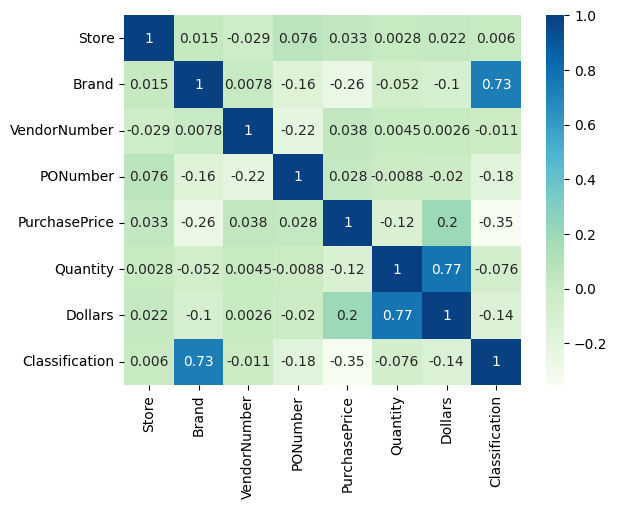

In [65]:
corr=corr=purchases.corr()
sns.heatmap(corr,annot=True,cmap='GnBu')

<Axes: xlabel='PayDate', ylabel='count'>

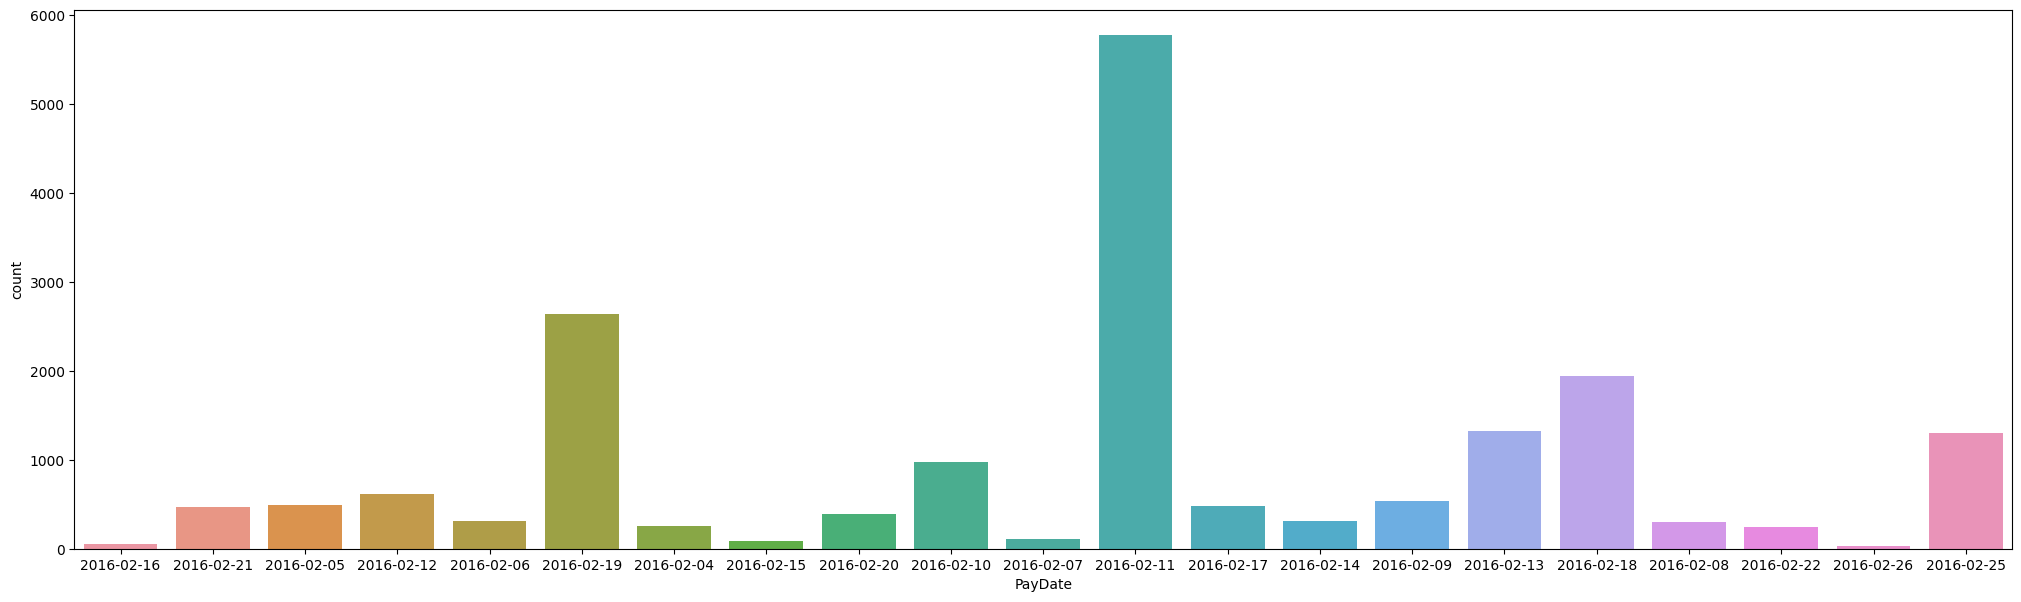

In [75]:
f=plt.figure()
f.set_figheight(7)
f.set_figwidth(25)
sns.countplot(x="PayDate", data=purchases)

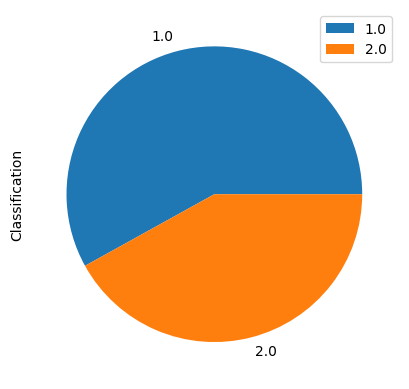

In [78]:
purchases['Classification'].value_counts().plot.pie()
plt.legend()
plt.show()

# 6.**Sales**

In [69]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1.0,16.49,16.49,1/1/2016,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2.0,32.98,16.49,1/2/2016,750.0,1.0,1.57,12546.0,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1.0,16.49,16.49,1/3/2016,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1.0,14.49,14.49,1/8/2016,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2.0,69.98,34.99,1/9/2016,375.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY


In [87]:
sales.describe()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
count,51770.000000,51770.000000,51769.000000,51769.000000,51769.000000,51769.000000,51769.000000,51769.000000,51769.000000
mean,7.283562,12432.887483,2.373138,30.676615,15.342505,919.412100,1.427669,1.238563,6938.245243
std,4.577055,12523.521108,3.329776,55.156067,12.415069,661.164387,0.494745,2.884752,8406.346712
min,1.000000,58.000000,1.000000,0.490000,0.490000,50.000000,1.000000,0.010000,105.000000
25%,1.000000,3612.000000,1.000000,10.990000,8.990000,750.000000,1.000000,0.160000,3252.000000
50%,10.000000,6429.000000,1.000000,17.990000,12.990000,750.000000,1.000000,0.580000,4425.000000
75%,11.000000,18868.000000,2.000000,31.990000,17.990000,1000.000000,2.000000,1.570000,9552.000000
max,12.000000,47090.000000,143.000000,4499.400000,349.990000,5000.000000,2.000000,220.500000,98450.000000


In [88]:
sales.size

724780

In [89]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51770 entries, 0 to 51769
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InventoryId     51770 non-null  object 
 1   Store           51770 non-null  int64  
 2   Brand           51770 non-null  int64  
 3   Description     51770 non-null  object 
 4   Size            51769 non-null  object 
 5   SalesQuantity   51769 non-null  float64
 6   SalesDollars    51769 non-null  float64
 7   SalesPrice      51769 non-null  float64
 8   SalesDate       51769 non-null  object 
 9   Volume          51769 non-null  float64
 10  Classification  51769 non-null  float64
 11  ExciseTax       51769 non-null  float64
 12  VendorNo        51769 non-null  float64
 13  VendorName      51769 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 5.5+ MB


In [90]:
sales.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              1
SalesQuantity     1
SalesDollars      1
SalesPrice        1
SalesDate         1
Volume            1
Classification    1
ExciseTax         1
VendorNo          1
VendorName        1
dtype: int64

In [93]:
sales.dropna(inplace=True)

In [94]:
sales.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [95]:
sales.nunique()

InventoryId       8513
Store                4
Brand             3789
Description       3305
Size                35
SalesQuantity       59
SalesDollars      1169
SalesPrice         160
SalesDate           31
Volume              18
Classification       2
ExciseTax          196
VendorNo            96
VendorName          97
dtype: int64

In [96]:
sales.dtypes

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
SalesQuantity     float64
SalesDollars      float64
SalesPrice        float64
SalesDate          object
Volume            float64
Classification    float64
ExciseTax         float64
VendorNo          float64
VendorName         object
dtype: object

<ipython-input-68-649390eedc69>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=corr=sales.corr()


<Axes: >

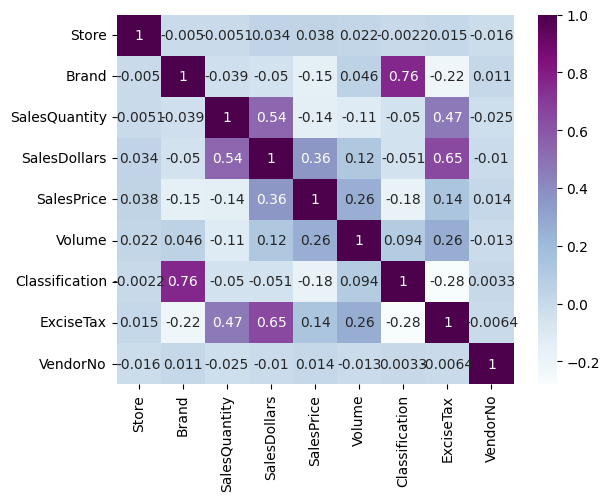

In [68]:
corr=corr=sales.corr()
sns.heatmap(corr,annot=True,cmap='BuPu')

<Axes: xlabel='SalesQuantity', ylabel='Store'>

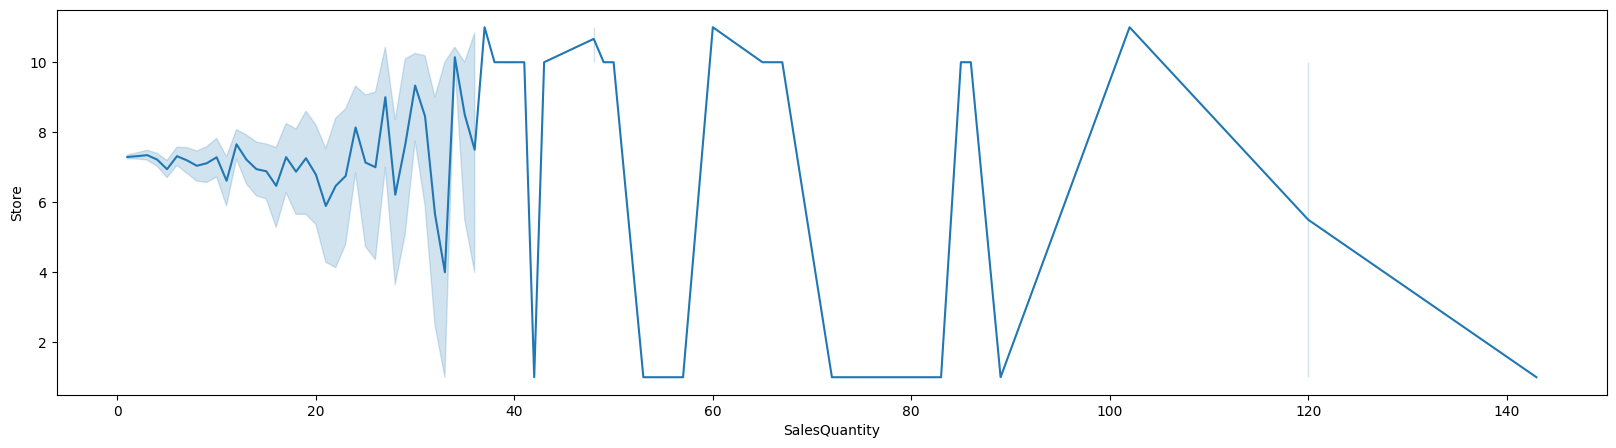

In [111]:
f=plt.figure()
f.set_figheight(5)
f.set_figwidth(20)
sns.lineplot(x="SalesQuantity",y="Store", data=sales)

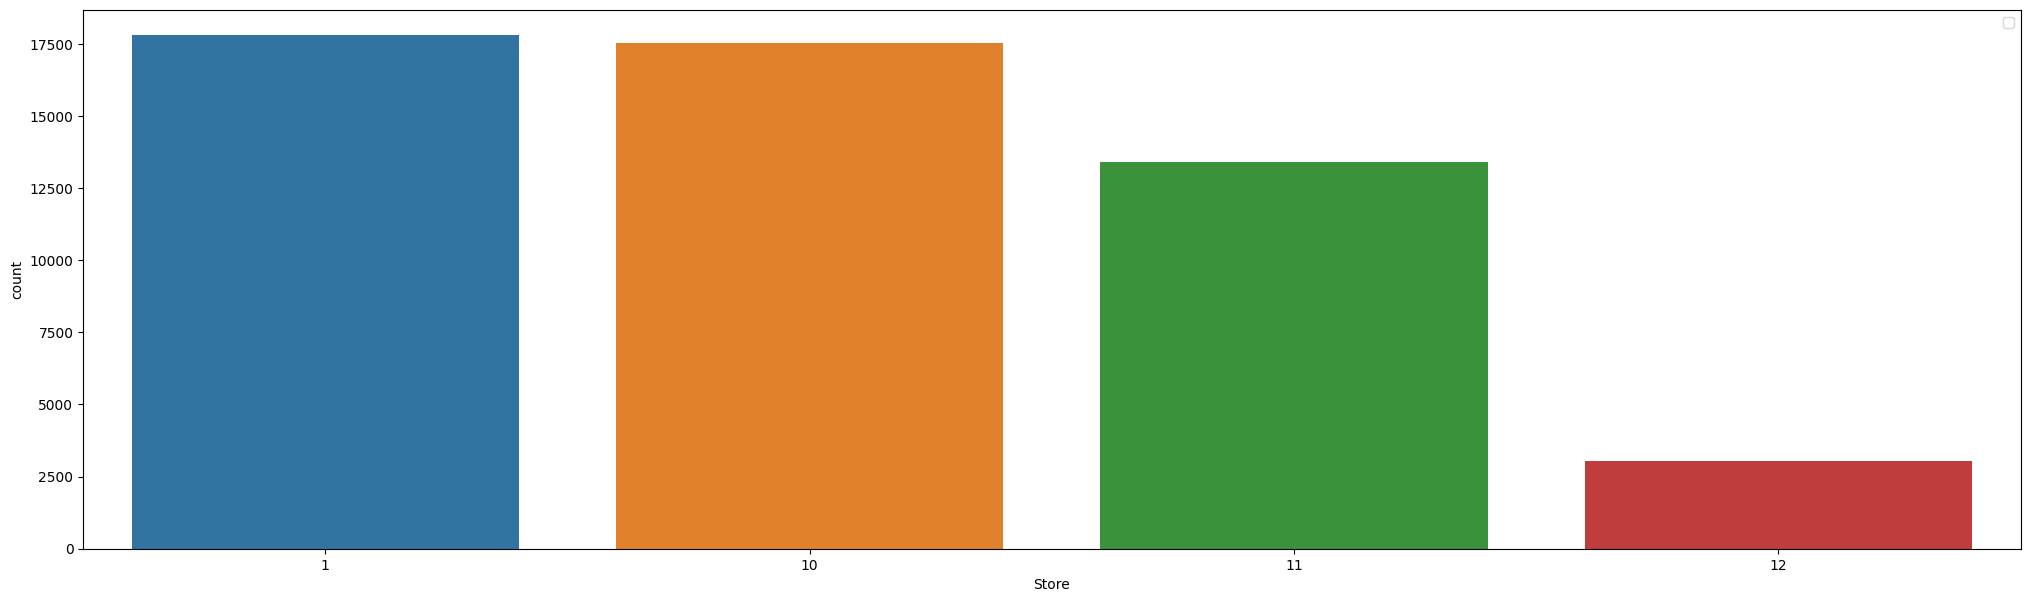

In [121]:
f=plt.figure()
f.set_figheight(7)
f.set_figwidth(25)
sns.countplot(x="Store", data=sales)